<h1>Import Libraries</h1>

In [1]:
import numpy as np

#data processing
import pandas as pd

#data visualization
import seaborn as sns
#to do visualization done below the code
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC , LinearSVC

<h1>Set Data Path</h1>

In [2]:
Data_path = './Data/titanic.csv'

In [3]:
df = pd.read_csv(Data_path)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df = df.dropna(subset=['pclass'])

In [6]:
df.head() 

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.shape

(1309, 14)

<h1>Data Set for Training</h1>

In [8]:
train_df = df.sample(frac=0.8,random_state=42)


<h1>Data Set for Testing</h1>

In [9]:
test_df = df.drop(train_df.index)

<h1>Reset Indexing & Use them</h1>

In [10]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [11]:
train_df.shape

(1047, 15)

In [12]:
test_df.shape

(262, 15)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1047 non-null   int64  
 1   pclass     1047 non-null   float64
 2   survived   1047 non-null   float64
 3   name       1047 non-null   object 
 4   sex        1047 non-null   object 
 5   age        839 non-null    float64
 6   sibsp      1047 non-null   float64
 7   parch      1047 non-null   float64
 8   ticket     1047 non-null   object 
 9   fare       1046 non-null   float64
 10  cabin      239 non-null    object 
 11  embarked   1045 non-null   object 
 12  boat       382 non-null    object 
 13  body       97 non-null     float64
 14  home.dest  602 non-null    object 
dtypes: float64(7), int64(1), object(7)
memory usage: 122.8+ KB


In [14]:
train_df.describe()

,index,pclass,survived,age,sibsp,parch,fare,body
count,1047.000000,1047.000000,1047.000000,839.000000,1047.000000,1047.000000,1046.000000,97.000000
mean,647.262655,2.282713,0.375358,29.971990,0.488061,0.357211,34.268041,156.288660
std,376.749716,0.839009,0.484447,14.463115,1.070909,0.763911,54.236348,97.397057
min,0.000000,1.000000,0.000000,0.416700,0.000000,0.000000,0.000000,1.000000
25%,322.500000,1.500000,0.000000,21.000000,0.000000,0.000000,7.895800,69.000000
50%,644.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,149.000000
75%,969.500000,3.000000,1.000000,39.000000,1.000000,0.000000,31.387500,255.000000
max,1307.000000,3.000000,1.000000,76.000000,8.000000,6.000000,512.329200,327.000000


In [15]:
train_df.head()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1148,3.0,0.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,NaN,S,NaN,NaN,NaN
1,1049,3.0,1.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,NaN,C,C,NaN,NaN
2,982,3.0,0.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,NaN,S,NaN,NaN,NaN
3,808,3.0,0.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,NaN,S,NaN,NaN,"Bridgwater, Somerset, England"
4,1195,3.0,0.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,NaN,Q,NaN,NaN,NaN


<h1>Missing Data</h1>

In [16]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,2)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','% Percentage'])
missing_data

,Total,% Percentage
body,950,90.74
cabin,808,77.17
boat,665,63.51
home.dest,445,42.50
age,208,19.87
embarked,2,0.19
fare,1,0.10
index,0,0.00
pclass,0,0.00
survived,0,0.00


In [17]:
train_df.columns.values

array(['index', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest'], dtype=object)

c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

Text(0.5, 1.0, 'Male')

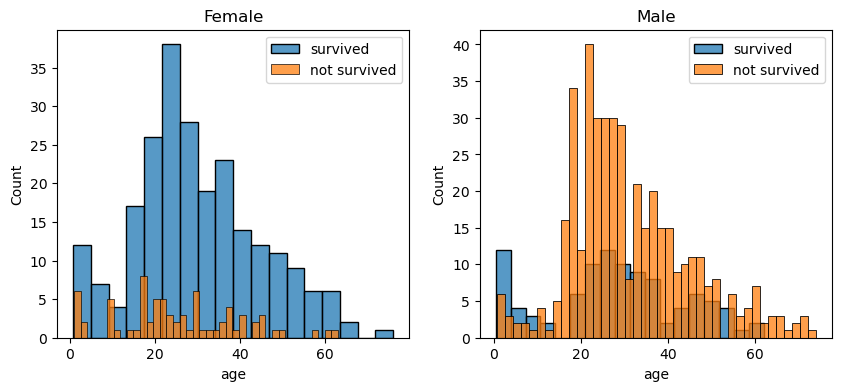

In [18]:
survived = 'survived'
not_survived = 'not survived'
fig,axes = plt.subplots(nrows = 1 , ncols = 2 ,figsize = (10,4))
women = train_df[train_df['sex']=='female']
men = train_df[train_df['sex']=='male']
ax = sns.histplot(women[women['survived']==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax = sns.histplot(women[women['survived']==0].age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['survived']==1].age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax = sns.histplot(men[men['survived']==0].age.dropna(),bins=40,label='not survived',ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')


c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

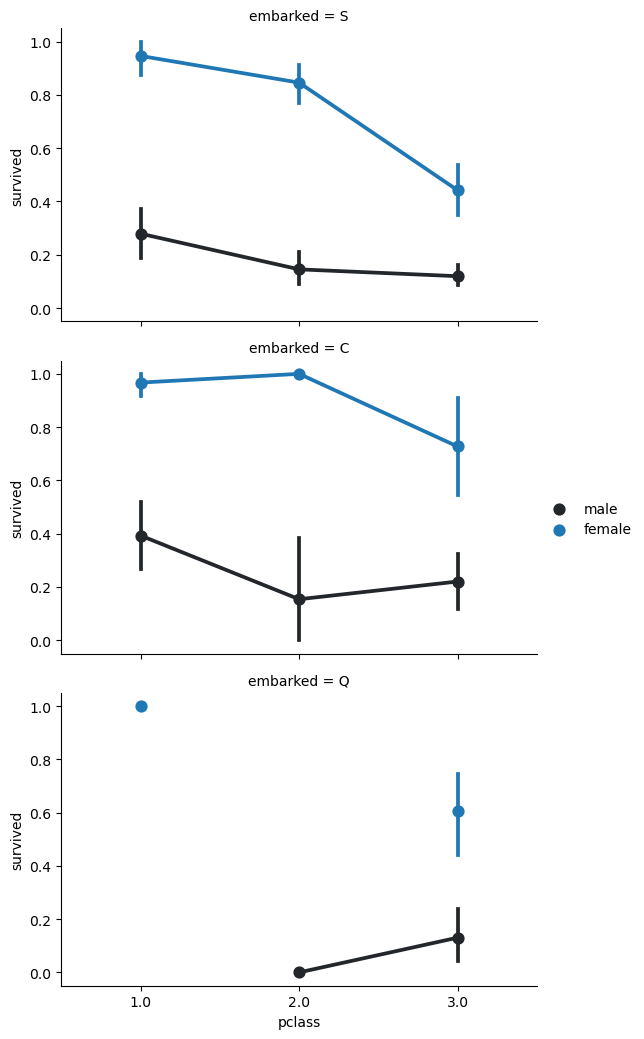

In [19]:
FacetGrid = sns.FacetGrid(train_df,row='embarked',height= 3.5 , aspect=1.6)
FacetGrid.map(sns.pointplot,'pclass','survived','sex',palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='pclass', ylabel='survived'>

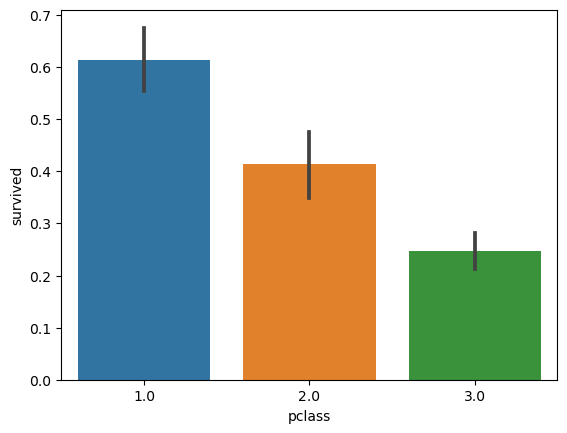

In [20]:
sns.barplot(x='pclass',y='survived',data =train_df)

In [21]:
data = [train_df, test_df]

for dataset in data:
    dataset['relatives'] = dataset['sibsp'] + dataset['parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].fillna(0).astype(int)
train_df['not_alone'].value_counts()

not_alone
1    644
0    403
Name: count, dtype: int64

c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Umesh Gayashan\.conda\envs\MachineLearning\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

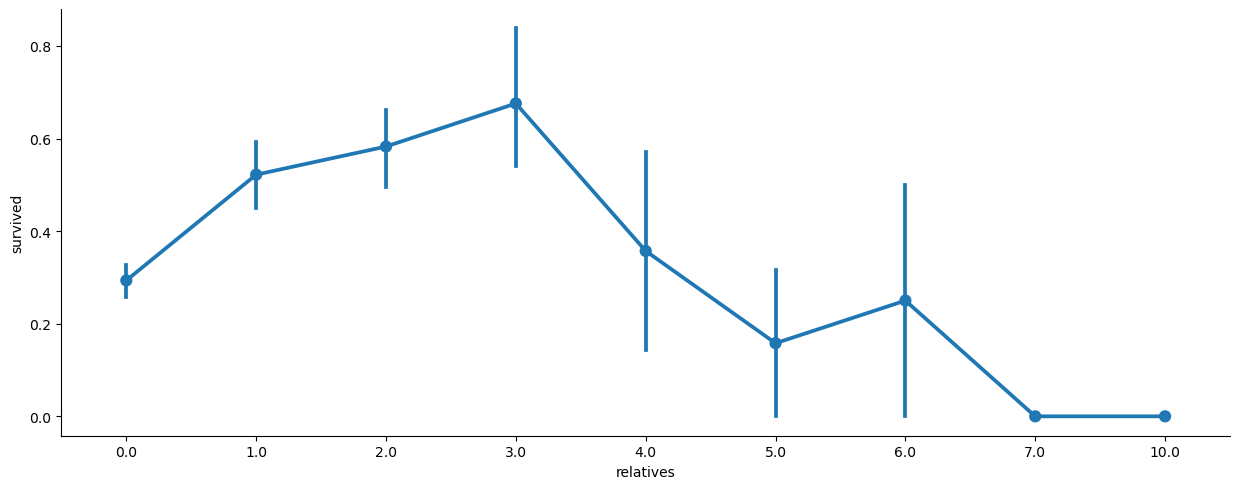

In [22]:
axes = sns.catplot(x='relatives', y='survived', data=train_df, aspect=2.5, kind='point')

<h1>Data Preprocessing & Feature Engineering</h1>

In [23]:
# train_df = train_df.drop(['body'],axis=1)

In [24]:
import re
deck = {"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7,"U":8}
data = [train_df,test_df]

for dataset in data:
    dataset['cabin'] = dataset["cabin"].fillna('U0')
    dataset['Deck'] = dataset["cabin"].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset["Deck"] = dataset["Deck"].map(deck)
    dataset["Deck"] = dataset["Deck"].fillna(0)
    dataset["Deck"] = dataset["Deck"].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['cabin'],axis=1)
test_df = test_df.drop(['cabin'],axis=1)

In [25]:
train_df.head()

,index,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,Deck
0,1148,3.0,0.0,"Rintamaki, Mr. Matti",male,35.0,0.0,0.0,STON/O 2. 3101273,7.1250,S,NaN,NaN,NaN,0.0,1,8
1,1049,3.0,1.0,"Nakid, Mr. Sahid",male,20.0,1.0,1.0,2653,15.7417,C,C,NaN,NaN,2.0,0,8
2,982,3.0,0.0,"Lyntakoff, Mr. Stanko",male,NaN,0.0,0.0,349235,7.8958,S,NaN,NaN,NaN,0.0,1,8
3,808,3.0,0.0,"Ford, Mr. Arthur",male,NaN,0.0,0.0,A/5 1478,8.0500,S,NaN,NaN,"Bridgwater, Somerset, England",0.0,1,8
4,1195,3.0,0.0,"Shaughnessy, Mr. Patrick",male,NaN,0.0,0.0,370374,7.7500,Q,NaN,NaN,NaN,0.0,1,8


<h3>Missing Age values become Random Age Value<h3>

In [26]:
import numpy as np

data = [train_df, test_df]

for dataset in data:
    mean_age = dataset['age'].mean()
    std_age = dataset['age'].std()
    is_null_age = dataset['age'].isnull().sum()
    
    # Compute random numbers between the mean, std, and the number of null values
    rand_age = np.random.randint(mean_age - std_age, mean_age + std_age, size=is_null_age)
    
    # Fill NaN values in 'age' column with random values generated
    age_slice = dataset['age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    
    # Assign the imputed 'age' column back to the dataset
    dataset.loc[np.isnan(dataset['age']), 'age'] = age_slice
    
    # Convert the 'age' column to integers
    dataset['age'] = dataset['age'].astype(int)

# Check missing values in 'age' column of the training dataset
train_df['age'].isnull().sum()


0

<h3>Missing Embarked values become Common Value<h3>

In [27]:
train_df['embarked'].describe()

count     1045
unique       3
top          S
freq       732
Name: embarked, dtype: object

In [28]:
common_value = 'S'
data = [train_df,test_df]
for dataset in data:
    dataset['embarked'] = dataset['embarked'].fillna(common_value)

In [29]:
train_df['embarked'].describe()

count     1047
unique       3
top          S
freq       734
Name: embarked, dtype: object

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1047 non-null   int64  
 1   pclass     1047 non-null   float64
 2   survived   1047 non-null   float64
 3   name       1047 non-null   object 
 4   sex        1047 non-null   object 
 5   age        1047 non-null   int32  
 6   sibsp      1047 non-null   float64
 7   parch      1047 non-null   float64
 8   ticket     1047 non-null   object 
 9   fare       1046 non-null   float64
 10  embarked   1047 non-null   object 
 11  boat       382 non-null    object 
 12  body       97 non-null     float64
 13  home.dest  602 non-null    object 
 14  relatives  1047 non-null   float64
 15  not_alone  1047 non-null   int32  
 16  Deck       1047 non-null   int32  
dtypes: float64(7), int32(3), int64(1), object(6)
memory usage: 126.9+ KB


<h3>Change Data type & fill missing (NaN) values in column with the specified value<h3>

In [31]:
data = [train_df,test_df]
for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      1047 non-null   int64  
 1   pclass     1047 non-null   float64
 2   survived   1047 non-null   float64
 3   name       1047 non-null   object 
 4   sex        1047 non-null   object 
 5   age        1047 non-null   int32  
 6   sibsp      1047 non-null   float64
 7   parch      1047 non-null   float64
 8   ticket     1047 non-null   object 
 9   fare       1047 non-null   int32  
 10  embarked   1047 non-null   object 
 11  boat       382 non-null    object 
 12  body       97 non-null     float64
 13  home.dest  602 non-null    object 
 14  relatives  1047 non-null   float64
 15  not_alone  1047 non-null   int32  
 16  Deck       1047 non-null   int32  
dtypes: float64(6), int32(4), int64(1), object(6)
memory usage: 122.8+ KB


In [33]:
data = [train_df,test_df]
titles = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}

for dataset in data:
    #extract titles
    dataset['Title'] = dataset.name.str.extract('([A-za-z]+)\.',expand = False)
    #replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms','Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs')

    #convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)

    #filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['name'],axis=1)
test_df = test_df.drop(['name'],axis=1)

In [34]:
genders = {'male':0,'female':1}

data = [train_df,test_df]
for dataset in data:
    dataset['sex'] = dataset['sex'].map(genders)

In [35]:
train_df.head()

,index,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,relatives,not_alone,Deck,Title
0,1148,3.0,0.0,0,35,0.0,0.0,STON/O 2. 3101273,7,S,NaN,NaN,NaN,0.0,1,8,1
1,1049,3.0,1.0,0,20,1.0,1.0,2653,15,C,C,NaN,NaN,2.0,0,8,1
2,982,3.0,0.0,0,33,0.0,0.0,349235,7,S,NaN,NaN,NaN,0.0,1,8,1
3,808,3.0,0.0,0,23,0.0,0.0,A/5 1478,8,S,NaN,NaN,"Bridgwater, Somerset, England",0.0,1,8,1
4,1195,3.0,0.0,0,31,0.0,0.0,370374,7,Q,NaN,NaN,NaN,0.0,1,8,1


In [36]:
train_df['ticket'].describe()

count         1047
unique         789
top       CA. 2343
freq             9
Name: ticket, dtype: object

In [37]:
#Because of high uniquness of Ticket Attribute it should be removed
train_df = train_df.drop(['ticket'],axis=1)
test_df = test_df.drop(['ticket'],axis=1)

In [38]:
train_df['embarked'].describe()

count     1047
unique       3
top          S
freq       734
Name: embarked, dtype: object

In [39]:
ports = {"S":0,"C":1,"Q":2}
data = [train_df,test_df]

for dataset in data:
    dataset['embarked'] = dataset["embarked"].map(ports)

In [40]:
data = [train_df, test_df]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 40), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[dataset['age'] > 66, 'age'] = 7

# Show how it's distributed
train_df['age'].value_counts()


age
6    195
4    182
3    169
5    158
2    153
1    111
0     71
7      8
Name: count, dtype: int64

In [41]:
train_df.tail(10)

,index,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,relatives,not_alone,Deck,Title
1037,1284,3.0,0.0,0,3,0.0,0.0,8,0,NaN,NaN,NaN,0.0,1,8,1
1038,190,1.0,1.0,1,2,0.0,0.0,77,0,10,NaN,"Hudson, NY",0.0,1,4,2
1039,992,3.0,0.0,1,4,0.0,0.0,7,2,NaN,61.0,NaN,0.0,1,8,2
1040,1278,3.0,0.0,0,2,0.0,0.0,7,0,NaN,NaN,NaN,0.0,1,8,1
1041,606,3.0,1.0,0,2,0.0,0.0,7,0,15,NaN,"Taalintehdas, Finland Hoboken, NJ",0.0,1,8,1
1042,180,1.0,1.0,1,5,0.0,0.0,211,0,2,NaN,NaN,0.0,1,8,2
1043,301,1.0,0.0,0,6,0.0,0.0,34,0,NaN,NaN,"East Orange, NJ",0.0,1,4,1
1044,496,2.0,0.0,0,4,0.0,0.0,13,0,NaN,NaN,"St Austall, Cornwall",0.0,1,8,1
1045,1131,3.0,1.0,0,4,0.0,0.0,8,0,9,NaN,NaN,0.0,1,5,1
1046,1085,3.0,0.0,0,4,0.0,0.0,7,0,NaN,NaN,NaN,0.0,1,8,1


In [42]:
train_df['fare'].value_counts()

fare
7      261
8       79
13      66
26      61
15      37
      ... 
89       1
40       1
45       1
133      1
47       1
Name: count, Length: 94, dtype: int64

In [43]:
data = [train_df, test_df]
for dataset in data:
    dataset.loc[dataset['fare'] <= 7.91, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare'] = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare'] = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare'] = 4
    dataset.loc[dataset['fare'] > 250, 'fare'] = 5
    dataset['fare'] = dataset['fare'].astype(int)

# Show how it's distributed
train_df['fare'].value_counts()


fare
0    290
1    251
2    249
3    184
4     59
5     14
Name: count, dtype: int64

In [44]:
train_df['boat'].value_counts()

boat
C          33
15         29
4          27
13         24
14         23
11         22
10         21
8          21
3          20
16         19
6          18
5          18
7          18
9          17
D          17
12         15
2          12
A          10
B           6
1           5
C D         2
5 9         1
13 15 B     1
5 7         1
13 15       1
15 16       1
Name: count, dtype: int64

<h3>Feature Engineering<h3>

In [45]:
data = [train_df,test_df]
for dataset in data:
    dataset['Age_Class'] = dataset['age']*dataset['pclass']

In [46]:
for dataset in data:
    dataset['Fare_per_Person'] = dataset['fare'] / (dataset['relatives'] + 1)
    # Replace NA or inf values with a default value, such as 0
    dataset['Fare_per_Person'].fillna(0, inplace=True)
    dataset['Fare_per_Person'].replace([np.inf, -np.inf], 0, inplace=True)
    dataset['Fare_per_Person'] = dataset['Fare_per_Person'].astype(int)


In [47]:
train_df['Fare_per_Person'].value_counts()

Fare_per_Person
0    480
1    380
2    106
3     55
4     22
5      4
Name: count, dtype: int64

In [48]:
train_df = train_df.drop(['index'],axis=1)
train_df = train_df.drop(['body'],axis=1)
train_df = train_df.drop(['boat'],axis=1)
train_df = train_df.drop(['home.dest'],axis=1)
train_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_Person
0,3.0,0.0,0,5,0.0,0.0,0,0,0.0,1,8,1,15.0,0
1,3.0,1.0,0,2,1.0,1.0,2,1,2.0,0,8,1,6.0,0
2,3.0,0.0,0,4,0.0,0.0,0,0,0.0,1,8,1,12.0,0
3,3.0,0.0,0,3,0.0,0.0,1,0,0.0,1,8,1,9.0,1
4,3.0,0.0,0,4,0.0,0.0,0,2,0.0,1,8,1,12.0,0


In [49]:
test_df = test_df.drop(['index'],axis=1)
test_df = test_df.drop(['body'],axis=1)
test_df = test_df.drop(['boat'],axis=1)
test_df = test_df.drop(['home.dest'],axis=1)
test_df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_per_Person
0,1.0,1.0,0,0,1.0,2.0,4,0,3.0,0,3,4,0.0,1
1,1.0,1.0,1,6,2.0,0.0,3,0,2.0,0,3,3,6.0,1
2,1.0,1.0,1,3,0.0,0.0,3,0,0.0,1,8,2,3.0,3
3,1.0,1.0,0,7,0.0,0.0,2,0,0.0,1,1,1,7.0,2
4,1.0,0.0,0,3,0.0,1.0,4,1,1.0,0,2,1,3.0,2


In [50]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,2)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','% Percentage'])
missing_data

,Total,% Percentage
pclass,0,0.0
survived,0,0.0
sex,0,0.0
age,0,0.0
sibsp,0,0.0
parch,0,0.0
fare,0,0.0
embarked,0,0.0
relatives,0,0.0
not_alone,0,0.0


In [51]:
X_train = train_df.drop('survived',axis=1)
Y_train = train_df['survived']
X_test = test_df.copy()

In [52]:
# Assuming your DataFrame is named 'df'
# Check for null values in each row
rows_with_null = df[df.isnull().any(axis=1)]

# Display rows with null values
print(rows_with_null)


      pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1304     3.0       0.0                             Zabour, Miss. Hileni   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.00

<h2>Modelling<h2>

In [56]:
# Assuming X_train and Y_train are defined previously
# Assuming you have cleaned and preprocessed the training and testing data similarly

# Instantiate and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = logreg.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- survived
